In [1]:
# Imports
import jeans

import numpy as np 
import matplotlib.pyplot as plt

The jeans model takes an input q0 that describes axis ratio at r1, i.e. q(rm) = q0. However, q0 also accepts an general axis ratio function q(r). 

The spherical model returns a trivial shape profile, q(r) = 1.

The squashed model returns a shape function q(r) via the class method .q(r_list) that is described in the paper. 

The isothermal model also returns q(r) via the class method .q_eff(r_list). 

Below are examples of first, inputting a constant axis ratio for the outer halo and second, inputting an axis ratio function for the outer halo, with shape profile plots showing the jeans model shape profile relaxing to the outer halo shape. 

# Constant outer halo axis ratio q0

In [4]:
q0 = 0.6
r1 = 20
M200 = 1e12
c = 10

# spherical profile, no q0
profile_spherial = jeans.spherical(r1, M200, c)

# squashed sidm profile 
profile_squashed = jeans.squashed(r1, M200, c, q0=q0)

# isothermal profile 
profile_isothermal = jeans.isothermal(r1, M200, c, q0=q0)

# cdm profile 
profile_cdm = jeans.cdm(M200, c, q0=q0)


Only the squashed model has the method q for the shape. Other models require using q_eff.

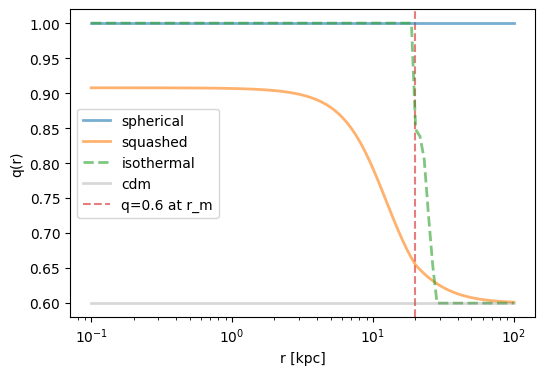

In [6]:
r_list = np.logspace(-1, 2, 100) # kpc

plt.figure(figsize=(6,4))

plt.plot(r_list, profile_spherial.q_eff(r_list),  ls='-', lw=2, alpha=0.6, c='C0', label='spherical')
plt.plot(r_list, profile_squashed.q(r_list), ls='-', lw=2, alpha=0.6, c='C1', label='squashed')
plt.plot(r_list, profile_isothermal.q_eff(r_list), ls='--', lw=2, alpha=0.6, c='C2', label='isothermal')
plt.plot(r_list, profile_cdm.q_eff(r_list), ls='-', lw=2, alpha=0.3, c='grey', label='cdm') # q_eff for cdm
plt.axvline(r1, ls='--', c='C3', alpha=0.6, zorder=0, label='q=0.6 at r_m')
plt.xlabel('r [kpc]')
plt.ylabel('q(r)')
plt.xscale('log')
plt.legend()
plt.show()

# Non-constant (power-law) outer halo shape 

You may also pass a function to the input q0 that describes the radial dependence of the outer halo. In the jeans model paper we use a simply power law expression, as below.

In [12]:
q0 = 0.6
r1 = 10
M200 = 1e12
R200 = 200
c = 10
alpha = -0.1
q_func = lambda r: q0 * (r / R200) ** alpha

# squashed sidm profile with radially dependent outer halo axis ratio
profile_squashed = jeans.squashed(r1, M200, c, q0=q_func)

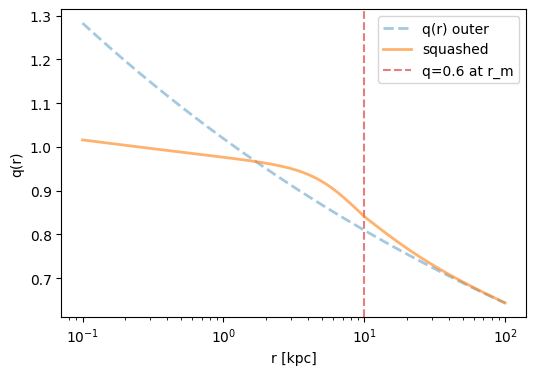

In [13]:
r_list = np.logspace(-1, 2, 100) # kpc

plt.figure(figsize=(6,4))

plt.plot(r_list, q_func(r_list), ls='--', lw=2, alpha=0.4, c='C0', label='q(r) outer')
plt.plot(r_list, profile_squashed.q(r_list), ls='-', lw=2, alpha=0.6, c='C1', label='squashed')
plt.axvline(r1, ls='--', c='C3', alpha=0.6, zorder=0, label='q=0.6 at r_m')
plt.xlabel('r [kpc]')
plt.ylabel('q(r)')
plt.xscale('log')
plt.legend()
plt.show()

The shape is an interpolation of the effects of the baryons potential, self-interactions, and the outer halo shape. Adding an asymmetric baryon potential alters the shape as follow. 

In [14]:
# Example baryonic potential: Miyamoto-Nagai disk
def Phi_b(r, th):
    GN = 4.302e-6 # gravitational constant in kpc (km/s)^2 Msun^-1
    Md = 6.4e10
    a = 3.5
    b = 0.53
    return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)

q0 = 0.6
r1 = 10
M200 = 1e12
R200 = 200
c = 10
alpha = -0.1
q_func = lambda r: q0 * (r / R200) ** alpha

# squashed sidm profile with radially dependent outer halo axis ratio
profile_squashed = jeans.squashed(r1, M200, c, q0=q_func, Phi_b=Phi_b)

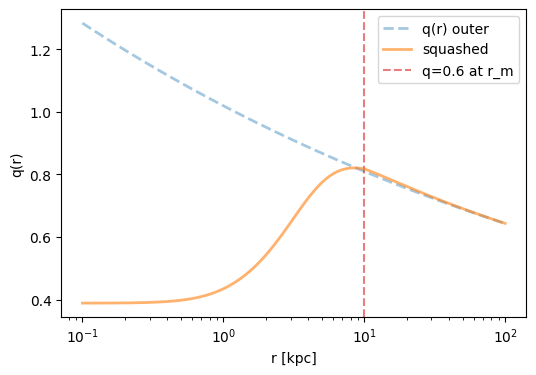

In [15]:
r_list = np.logspace(-1, 2, 100) # kpc

plt.figure(figsize=(6,4))

plt.plot(r_list, q_func(r_list), ls='--', lw=2, alpha=0.4, c='C0', label='q(r) outer')
plt.plot(r_list, profile_squashed.q(r_list), ls='-', lw=2, alpha=0.6, c='C1', label='squashed')
plt.axvline(r1, ls='--', c='C3', alpha=0.6, zorder=0, label='q=0.6 at r_m')
plt.xlabel('r [kpc]')
plt.ylabel('q(r)')
plt.xscale('log')
plt.legend()
plt.show()

Where now the shape in the core is driven toward prolate (q<1) due to the influence of baryons. 